In [203]:
import pandas as pd
import pandas_ta as ta
# https://finvizfinance.readthedocs.io/en/latest/#
from finvizfinance.quote import finvizfinance
from cleantext import clean
pd.set_option('display.max_columns', None)
import numpy as np

In [2]:
# CHANGEABLE var = stock (AAPL, NFLX, TSLA)
stock = finvizfinance('AAPL')

In [3]:
news_df = stock.ticker_news()
news_df = news_df.set_index(['Date']) # datetimeindex ipv rangeindex
news_df.sort_index(inplace=True, ascending=True)
#stock_description = stock.ticker_description()


In [4]:
news_df.head(10)

,Title,Link
Date,,
2023-08-07 01:00:00,How Britain lost its quirky tech champion to t...,https://finance.yahoo.com/m/a1883242-3b05-39e8...
2023-08-07 02:55:00,5 big analyst picks & cuts: 'AI an emerging dr...,https://finance.yahoo.com/news/5-big-analyst-p...
2023-08-07 04:11:00,"Warner Bros Discovery, KKR, Cinemark rise prem...",https://finance.yahoo.com/news/warner-bros-dis...
2023-08-07 05:21:00,47% of Warren Buffett's $375 Billion Portfolio...,https://finance.yahoo.com/m/cb2f6819-fac8-3ae6...
2023-08-07 05:50:00,3 Best Warren Buffett Stocks to Buy and Hold i...,https://finance.yahoo.com/m/8ffc74e7-1613-3316...
2023-08-07 06:00:00,Bulls Will Need a Little Patience as the Summe...,https://finance.yahoo.com/m/b3163391-d277-3232...
2023-08-07 06:00:00,The current bull market is actually very sensi...,https://finance.yahoo.com/news/the-current-bul...
2023-08-07 08:38:00,We'll Reassess Chipotle and McDonald's on Repo...,https://finance.yahoo.com/m/5c37234b-7b27-3e98...
2023-08-07 08:39:00,Better Buy: Apple vs. Amazon,https://finance.yahoo.com/m/73b03170-8ed3-3e5a...


In [5]:
# now = pd.to_datetime('now') #datetime object
now = pd.to_datetime('now') #datetime.date object to only get the date
yesterday = (pd.to_datetime('now') - pd.Timedelta('1 day'))

In [6]:
yesterday

Timestamp('2023-08-13 12:44:16.853095')

In [7]:
df = news_df.loc[yesterday:now]

In [8]:
news_df.tail()

,Title,Link
Date,,
2023-08-13 05:55:00,Here's the 1 Warren Buffett Stock That's Most ...,https://finance.yahoo.com/m/4424e735-a518-3fbc...
2023-08-13 07:11:00,1 Magnificent Warren Buffett Stock That Turned...,https://finance.yahoo.com/m/51732720-2272-3b51...
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...
2023-08-14 05:02:00,iPhone Maker Foxconn Beats Expectations. Apple...,https://finance.yahoo.com/m/e62e7ab4-66c6-35b5...
2023-08-14 06:00:00,Tech stocks have a yield problem: Morning Brief,https://finance.yahoo.com/news/tech-stocks-hav...


In [9]:
df.head()

,Title,Link
Date,,
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...
2023-08-14 05:02:00,iPhone Maker Foxconn Beats Expectations. Apple...,https://finance.yahoo.com/m/e62e7ab4-66c6-35b5...
2023-08-14 06:00:00,Tech stocks have a yield problem: Morning Brief,https://finance.yahoo.com/news/tech-stocks-hav...


In [10]:
df.sort_values(by='Date', ascending=False, inplace=True)

C:\Users\ali\AppData\Local\Temp\ipykernel_15844\785106850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', ascending=False, inplace=True)


In [11]:
df.head()

,Title,Link
Date,,
2023-08-14 06:00:00,Tech stocks have a yield problem: Morning Brief,https://finance.yahoo.com/news/tech-stocks-hav...
2023-08-14 05:02:00,iPhone Maker Foxconn Beats Expectations. Apple...,https://finance.yahoo.com/m/e62e7ab4-66c6-35b5...
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...


Now we have our DataFrame with the chosen Stock and a chosen timeframe (yesterday till today)
Next we can loop through the news articles with the previous function

In [12]:
from newspaper import Article
from textblob import Word
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from functions import *
from newspaper import Article
from textblob import TextBlob

In [13]:
# two functions to get either the summary of an article or the whole text
def returnNewspaperFullText(url):
    a = Article(url)
    a.download()
    a.parse()
    return a.title+'\n'+ clean(a.text, no_urls=True, no_currency_symbols=True, no_punct=True)

def returnNewspaperSummary(url):
    a = Article(url)
    a.download()
    a.parse()
    a.nlp()
    txt = a.summary
    return a.title+'\n'+ clean(txt, no_urls=True, no_currency_symbols=True, no_punct=True)

url = 'https://finance.yahoo.com/news/apple-debuts-programs-highlighting-data-privacy-and-security-160057954.html'

In [14]:
# now that we extracted the text with newspaper we will feed this into a textblob object
b = TextBlob(returnNewspaperSummary(url))
print(b)
# i will not use the correct() function as in this example is turns the word 'debuts' into 'debt' and that will have a bad sentiment for no reason
#print(blob.correct())

# The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
print(b.sentiment.polarity)

# function to return the polarity
def return_polarity(summaryOrFulltextFunction):
    b = TextBlob(summaryOrFulltextFunction)
    return b.polarity

Apple debuts programs highlighting data privacy and security
apple aapl is launching a new campaign to highlight its privacy and data security offerings as part of data security day on jan 28 and its using some of its star power to do it
the video titled a day in the life of an average persons data is broken down into chapters highlighting features like mail privacy protection intelligent tracking prevention and app tracking transparency is meant to provide users with a better understanding of apples privacy and data security features
thats also drawn criticism from companies like meta meta which have been hurt by apples privacy efforts
apple has debuted a new video outlining its various data privacy and security offerings
for apple security and data privacy are as much of a product feature as the camera on the iphone
0.1185746352413019


In [15]:
# # now if we want the polarity score of the news from last day for a stock:
# for i in df.index:
#     #print(df['Title'][i], df['Link'][i], '\n')
    
#     print(df['Link'][i] ,'\n' )
#     print(return_polarity(returnNewspaperSummary(df['Link'][i])))


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#print(manon.head())
sia = SentimentIntensityAnalyzer()

In [17]:
df[:10]['Link'].values

array(['https://finance.yahoo.com/news/tech-stocks-have-a-yield-problem-morning-brief-100009783.html',
       'https://finance.yahoo.com/m/e62e7ab4-66c6-35b5-9258-613f47020105/iphone-maker-foxconn-beats.html',
       'https://finance.yahoo.com/news/iphone-maker-hon-hai-cuts-064519519.html'],
      dtype=object)

In [18]:
god = df[2:5]

In [19]:
god.head()

,Title,Link
Date,,
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...


In [20]:
kys = df[:3]

In [21]:
kys.head()

,Title,Link
Date,,
2023-08-14 06:00:00,Tech stocks have a yield problem: Morning Brief,https://finance.yahoo.com/news/tech-stocks-hav...
2023-08-14 05:02:00,iPhone Maker Foxconn Beats Expectations. Apple...,https://finance.yahoo.com/m/e62e7ab4-66c6-35b5...
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...


In [22]:
def getPolaritiesFromDf(aDf): #takes a df, makes a copy of it and calculates the polarities, returns a df 
    df = aDf.copy()
    for index, row in df.iterrows():
        url = row['Link']
        if (hasExternalLink(url) == True):
            print(url)
            print('return:' ,hasExternalLink(url))
            #print('Return value is:' , hasExternalLink(url))
            summary = returnNewspaperSummary(getExternalLink(url))
            fulltext = returnNewspaperFullText(getExternalLink(url))
            summary_polarity = return_polarity(summary)
            fulltext_polarity = return_polarity(fulltext)
            print('Summary polarity: ', summary_polarity)
            print('Fulltext polarity:', fulltext_polarity)
            vaderSummary = sia.polarity_scores(summary)['compound']
            vaderFulltext = sia.polarity_scores(fulltext)['compound']
            print('Vader Summary: ', vaderSummary)
            print('Vader Fulltext: ', vaderFulltext)
            df.loc[index,'PolaritySummary'] = summary_polarity
            df.loc[index,'PolarityFulltext'] = fulltext_polarity
            df.loc[index,'Summary'] = summary
            df.loc[index,'Fulltext'] = fulltext
            df.loc[index,'VaderSummary'] = vaderSummary
            df.loc[index,'VaderFulltext'] = vaderFulltext

            #print(getExternalLink(url))
            print('\n')
        elif (hasExternalLink(url) == 'accessError'):
            print(url)
            print(hasExternalLink(url))
            #print('return:' ,hasExternalLink(url))
            #print('return value is:' , hasExternalLink(url))
            print('no polarity due to no access')
            df.loc[index,'PolaritySummary'] = None
            df.loc[index,'PolarityFulltext'] = None
            df.loc[index,'Summary'] = None
            df.loc[index,'Fulltext'] =None
            df.loc[index,'VaderSummary'] = None
            df.loc[index,'VaderFulltext'] = None
            print('\n')
        else:
            print(url)
            print('return:' ,hasExternalLink(url))
            #print('return value is:' , hasExternalLink(url))
            summary = returnNewspaperSummary(url)
            fulltext = returnNewspaperFullText(url)
            summary_polarity = return_polarity(summary)
            fulltext_polarity = return_polarity(fulltext)
            print('Summary polarity: ', summary_polarity)
            print('Fulltext polarity:', fulltext_polarity)
            vaderSummary = sia.polarity_scores(summary)['compound']
            vaderFulltext = sia.polarity_scores(fulltext)['compound']
            print('Vader Summary: ', vaderSummary)
            print('Vader Fulltext: ', vaderFulltext)
            df.loc[index,'PolaritySummary'] = summary_polarity
            df.loc[index,'PolarityFulltext'] = fulltext_polarity
            df.loc[index,'Summary'] = summary
            df.loc[index,'Fulltext'] = fulltext
            df.loc[index,'VaderSummary'] = vaderSummary
            df.loc[index,'VaderFulltext'] = vaderFulltext
            print('\n')
    return df

In [23]:
print(isForbiddenUrl('https://www.barrons.com/articles/tech-nasdaq-downturn-ai-nvidia-microsoft-apple-eb1aaf59?siteid=yhoof2'))

True


In [24]:
manon = getPolaritiesFromDf(god)

https://finance.yahoo.com/news/iphone-maker-hon-hai-cuts-064519519.html
return: False
Summary polarity:  0.15
Fulltext polarity: 0.07002164502164501
Vader Summary:  -0.6486
Vader Fulltext:  0.8234




In [25]:
manon.head()

,Title,Link,PolaritySummary,PolarityFulltext,Summary,Fulltext,VaderSummary,VaderFulltext
Date,,,,,,,,
2023-08-14 04:39:00,IPhone Maker Hon Hai Cuts Outlook After Mobile...,https://finance.yahoo.com/news/iphone-maker-ho...,0.15,0.070022,IPhone Maker Hon Hai Cuts Outlook After Mobile...,IPhone Maker Hon Hai Cuts Outlook After Mobile...,-0.6486,0.8234


Sentiment analysis no polarity

In [26]:
#tokens = nltk.word_tokenize(example)

In [27]:
#tokens[:10]

In [28]:
#tagged = nltk.pos_tag(tokens)
#tagged[:10]

VADER sentiment analysis

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [148]:
from alpha_vantage.timeseries import TimeSeries
def get_df_for_ticker_on_date(ticker, begindate, enddate):
    #get data for last week of ticker
    APIKEY = "XIBTEAC0WWX5ONGP"
    ts = TimeSeries(APIKEY, output_format='pandas')
    df, meta = ts.get_daily(ticker, outputsize='full')
    df.sort_values(by='date', ascending = True, inplace=True)
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df.columns = columns
    customdf = df[begindate : enddate]
    customdf.attrs['Name'] = ticker
    return customdf
    

In [31]:
beg = '2023-08-05'
end = '2023-08-10'
lmfao = get_df_for_ticker_on_date('AAPL', beg, end)

In [32]:
lmfao.head(51)

,Open,High,Low,Close,Volume
date,,,,,
2023-08-07,182.13,183.13,177.35,178.85,97576069.0
2023-08-08,179.69,180.27,177.58,179.80,67823003.0
2023-08-09,180.87,180.93,177.01,178.19,60378492.0
2023-08-10,179.48,180.75,177.60,177.97,54686851.0


In [33]:
def get_polarity_for_ticker_on_date(ticker, begindate, enddate):
    #first we get all the news for a certain day
    #then we take the average polarity for that day
    stock = finvizfinance(ticker)
    news_df = stock.ticker_news()
    news_df = news_df.set_index(['Date']) # datetimeindex ipv rangeindex
    news_df.sort_index(inplace=True, ascending=True)
    df = news_df.loc[pd.to_datetime(begindate):pd.to_datetime(enddate)]
    return df

In [34]:
rofl = get_polarity_for_ticker_on_date('AAPL', beg,end)

In [35]:
rofl.head(10)

,Title,Link
Date,,
2023-08-07 01:00:00,How Britain lost its quirky tech champion to t...,https://finance.yahoo.com/m/a1883242-3b05-39e8...
2023-08-07 02:55:00,5 big analyst picks & cuts: 'AI an emerging dr...,https://finance.yahoo.com/news/5-big-analyst-p...
2023-08-07 04:11:00,"Warner Bros Discovery, KKR, Cinemark rise prem...",https://finance.yahoo.com/news/warner-bros-dis...
2023-08-07 05:21:00,47% of Warren Buffett's $375 Billion Portfolio...,https://finance.yahoo.com/m/cb2f6819-fac8-3ae6...
2023-08-07 05:50:00,3 Best Warren Buffett Stocks to Buy and Hold i...,https://finance.yahoo.com/m/8ffc74e7-1613-3316...
2023-08-07 06:00:00,Bulls Will Need a Little Patience as the Summe...,https://finance.yahoo.com/m/b3163391-d277-3232...
2023-08-07 06:00:00,The current bull market is actually very sensi...,https://finance.yahoo.com/news/the-current-bul...
2023-08-07 08:38:00,We'll Reassess Chipotle and McDonald's on Repo...,https://finance.yahoo.com/m/5c37234b-7b27-3e98...
2023-08-07 08:39:00,Better Buy: Apple vs. Amazon,https://finance.yahoo.com/m/73b03170-8ed3-3e5a...


In [36]:
rofl = getPolaritiesFromDf(rofl)

https://finance.yahoo.com/m/a1883242-3b05-39e8-810c-2cc768556ac8/how-britain-lost-its-quirky.html
return: False
Summary polarity:  0.0031249999999999993
Fulltext polarity: 0.05471376713564214
Vader Summary:  0.8898
Vader Fulltext:  0.9982


https://finance.yahoo.com/news/5-big-analyst-picks-cuts-065552681.html
return: False
Summary polarity:  0.06269841269841271
Fulltext polarity: 0.1423137973137973
Vader Summary:  -0.5423
Vader Fulltext:  0.9951


https://finance.yahoo.com/news/warner-bros-discovery-kkr-cinemark-081136942.html
return: False
Summary polarity:  0.042
Fulltext polarity: 0.14023162661093697
Vader Summary:  -0.7717
Vader Fulltext:  -0.296


https://finance.yahoo.com/m/cb2f6819-fac8-3ae6-a60a-15bac34d9a89/47%25-of-warren-buffett%27s-%24375.html
return: True
Summary polarity:  -0.06249999999999999
Fulltext polarity: 0.08964502164502162
Vader Summary:  0.875
Vader Fulltext:  0.9992


https://finance.yahoo.com/m/8ffc74e7-1613-3316-aeff-42328e5199ac/3-best-warren-buffett-stocks

In [37]:
rofl.head()

,Title,Link,PolaritySummary,PolarityFulltext,Summary,Fulltext,VaderSummary,VaderFulltext
Date,,,,,,,,
2023-08-07 01:00:00,How Britain lost its quirky tech champion to t...,https://finance.yahoo.com/m/a1883242-3b05-39e8...,0.003125,0.054714,How Britain lost its quirky tech champion to t...,How Britain lost its quirky tech champion to t...,0.8898,0.9982
2023-08-07 02:55:00,5 big analyst picks & cuts: 'AI an emerging dr...,https://finance.yahoo.com/news/5-big-analyst-p...,0.062698,0.142314,5 big analyst picks & cuts: 'AI an emerging dr...,5 big analyst picks & cuts: 'AI an emerging dr...,-0.5423,0.9951
2023-08-07 04:11:00,"Warner Bros Discovery, KKR, Cinemark rise prem...",https://finance.yahoo.com/news/warner-bros-dis...,0.042000,0.140232,"Midday movers: Warner Bros. Discovery, Tyson F...","Midday movers: Warner Bros. Discovery, Tyson F...",-0.7717,-0.2960
2023-08-07 05:21:00,47% of Warren Buffett's $375 Billion Portfolio...,https://finance.yahoo.com/m/cb2f6819-fac8-3ae6...,-0.062500,0.089645,47% of Warren Buffett's $375 Billion Portfolio...,47% of Warren Buffett's $375 Billion Portfolio...,0.8750,0.9992
2023-08-07 05:50:00,3 Best Warren Buffett Stocks to Buy and Hold i...,https://finance.yahoo.com/m/8ffc74e7-1613-3316...,0.221537,0.184953,3 Best Warren Buffett Stocks to Buy and Hold i...,3 Best Warren Buffett Stocks to Buy and Hold i...,0.8934,0.9967


In [38]:
def get_polarity_per_day_on_df(df):
    #date_list = aDf.index.map(pd.Timestamp.date).unique() #not needed anymore
    # df = pd.DataFrame
    # for i in date_list:
    #     temp_df = aDf.loc[str(i) : str(i)]
    # return temp_df
    df = df.drop(columns=['Title', 'Link', 'Summary', 'Fulltext'])
    # using normalize to get rid of the hours per datetime.date row
    df.index.normalize()
    new_df = df.groupby(df.index.date).mean()
    return new_df


    
        
    

In [39]:
ff = get_polarity_per_day_on_df(rofl)

In [40]:
ff.head()

,PolaritySummary,PolarityFulltext,VaderSummary,VaderFulltext
2023-08-07,0.131841,0.125336,0.517864,0.885055
2023-08-08,0.184738,0.107751,0.533808,0.760633
2023-08-09,0.159899,0.114251,0.484505,0.571635


Now we need to merge both df's ( new_df and lmfao)

In [41]:
def merge_df_price_and_df_mean_polarities(df1, df2):
    return df1.merge(df2, left_index=True, right_index=True, how='outer')
    

All coming together:

In [42]:
def get_total_info_on_ticker(ticker, begindate, enddate):
    # 1. we get the data for a certain ticker (OHLC data)
    data_df = get_df_for_ticker_on_date(ticker, beg, end)

    # 2. we get all the news for given ticker for the dates
    news_df = get_polarity_for_ticker_on_date(ticker, beg, end)

    # 3. we calculate the polarities and Vader
    news_df = getPolaritiesFromDf(news_df)

    # 4. we take the average for each day
    news_df = get_polarity_per_day_on_df(news_df)

    # 5. we combine both df's 
    comb_df = merge_df_price_and_df_mean_polarities(data_df, news_df)
    return comb_df


In [43]:
ticker = 'AAPL'
beg = '2023-08-05'
end = '2023-08-10'

output = get_total_info_on_ticker(ticker, beg, end)

https://finance.yahoo.com/m/a1883242-3b05-39e8-810c-2cc768556ac8/how-britain-lost-its-quirky.html
return: False
Summary polarity:  0.0031249999999999993
Fulltext polarity: 0.05471376713564214
Vader Summary:  0.8898
Vader Fulltext:  0.9982


https://finance.yahoo.com/news/5-big-analyst-picks-cuts-065552681.html
return: False
Summary polarity:  0.06269841269841271
Fulltext polarity: 0.1423137973137973
Vader Summary:  -0.5423
Vader Fulltext:  0.9951


https://finance.yahoo.com/news/warner-bros-discovery-kkr-cinemark-081136942.html
return: False
Summary polarity:  0.042
Fulltext polarity: 0.14023162661093697
Vader Summary:  -0.7717
Vader Fulltext:  -0.296


https://finance.yahoo.com/m/cb2f6819-fac8-3ae6-a60a-15bac34d9a89/47%25-of-warren-buffett%27s-%24375.html
return: True
Summary polarity:  -0.06249999999999999
Fulltext polarity: 0.08964502164502162
Vader Summary:  0.875
Vader Fulltext:  0.9992


https://finance.yahoo.com/m/8ffc74e7-1613-3316-aeff-42328e5199ac/3-best-warren-buffett-stocks

In [44]:
output.head(10)

,Open,High,Low,Close,Volume,PolaritySummary,PolarityFulltext,VaderSummary,VaderFulltext
2023-08-07,182.13,183.13,177.35,178.85,97576069.0,0.131841,0.125336,0.517864,0.885055
2023-08-08,179.69,180.27,177.58,179.80,67823003.0,0.184738,0.107751,0.533808,0.760633
2023-08-09,180.87,180.93,177.01,178.19,60378492.0,0.159899,0.114251,0.484505,0.571635
2023-08-10,179.48,180.75,177.60,177.97,54686851.0,NaN,NaN,NaN,NaN


In [45]:
output.head()

,Open,High,Low,Close,Volume,PolaritySummary,PolarityFulltext,VaderSummary,VaderFulltext
2023-08-07,182.13,183.13,177.35,178.85,97576069.0,0.131841,0.125336,0.517864,0.885055
2023-08-08,179.69,180.27,177.58,179.80,67823003.0,0.184738,0.107751,0.533808,0.760633
2023-08-09,180.87,180.93,177.01,178.19,60378492.0,0.159899,0.114251,0.484505,0.571635
2023-08-10,179.48,180.75,177.60,177.97,54686851.0,NaN,NaN,NaN,NaN


In [46]:
output2 = output.copy()

In [47]:
output2['CloseTomorrow'] = output2['Close'].shift(-1)

In [48]:
output2.head()

,Open,High,Low,Close,Volume,PolaritySummary,PolarityFulltext,VaderSummary,VaderFulltext,CloseTomorrow
2023-08-07,182.13,183.13,177.35,178.85,97576069.0,0.131841,0.125336,0.517864,0.885055,179.80
2023-08-08,179.69,180.27,177.58,179.80,67823003.0,0.184738,0.107751,0.533808,0.760633,178.19
2023-08-09,180.87,180.93,177.01,178.19,60378492.0,0.159899,0.114251,0.484505,0.571635,177.97
2023-08-10,179.48,180.75,177.60,177.97,54686851.0,NaN,NaN,NaN,NaN,NaN


Plot Vader results

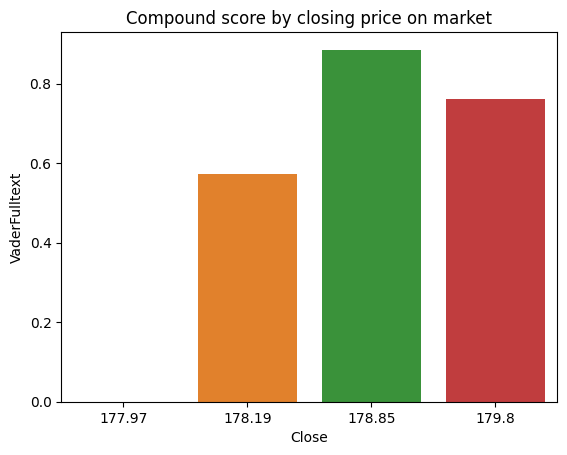

In [49]:
ax = sns.barplot(data=output, x='Close', y='VaderFulltext')
ax.set_title('Compound score by closing price on market')
plt.show()

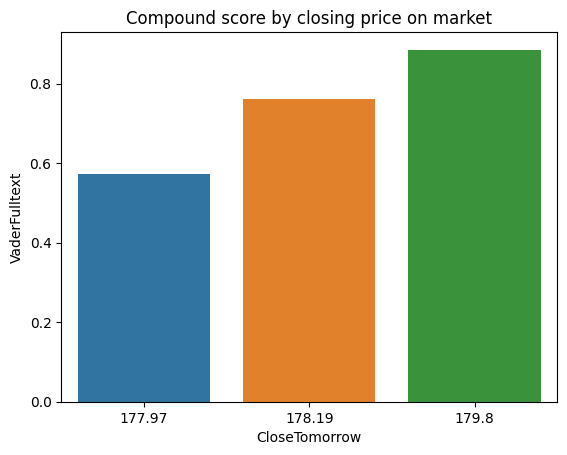

In [51]:
ax = sns.barplot(data=output2, x='CloseTomorrow', y='VaderFulltext')
ax.set_title('Compound score by closing price on market')
plt.show()

In [52]:
einde = pd.to_datetime('now') #datetime.date object to only get the date
start = (pd.to_datetime('now') - pd.Timedelta('30 days'))

ty = get_df_for_ticker_on_date('TSLA', start, einde)

    
tyty = get_polarity_for_ticker_on_date('TSLA', start, einde)

In [53]:
tyty.tail()

,Title,Link
Date,,
2023-08-14 07:39:00,3 Key Things From Rivian's Earnings Call Inves...,https://finance.yahoo.com/m/57f0ed6c-fa08-3692...
2023-08-14 07:41:00,Electric vehicles: Tesla gives China rivals a ...,https://finance.yahoo.com/m/619d66fa-616a-3bd1...
2023-08-14 07:41:00,US STOCKS-Futures rise as megacap growth stock...,https://finance.yahoo.com/news/us-stocks-futur...
2023-08-14 08:07:00,These Stocks Are Moving the Most Today: U.S. S...,https://finance.yahoo.com/m/151c2743-5df1-3501...
2023-08-14 08:09:00,The UAW vs The Big Three: why the union's wish...,https://finance.yahoo.com/news/the-uaw-vs-the-...


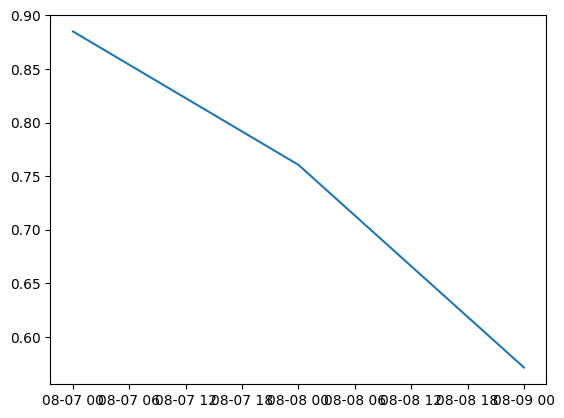

In [54]:
plt.plot(output2.index, output2["VaderFulltext"])


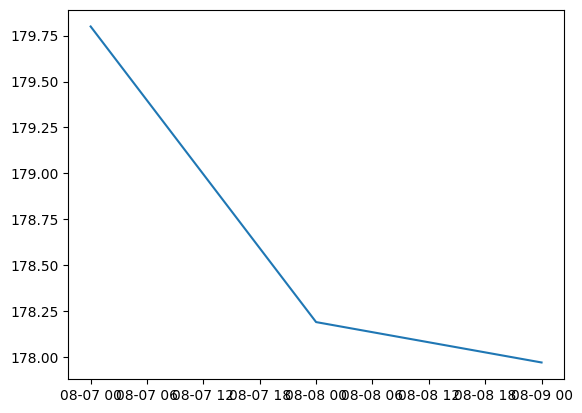

In [56]:
plt.plot(output2.index, output2["CloseTomorrow"])

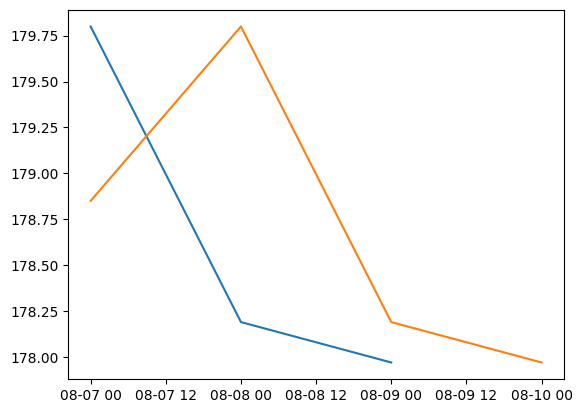

In [69]:
plt.plot(output2.index, output2["CloseTomorrow"],output2["Close"] )


In [149]:
beg = '2023-06-01'
end = '2023-08-01'
AAPL = get_df_for_ticker_on_date('AAPL', beg, end)

NFLX = get_df_for_ticker_on_date('NFLX', beg, end)
TSLA = get_df_for_ticker_on_date('TSLA', beg, end)

In [151]:
def get_df_name(df):
    return df.attrs['Name']

In [72]:
TSLA.head()

,Open,High,Low,Close,Volume
date,,,,,
2023-06-01,202.59,209.8000,199.370,207.52,148029931.0
2023-06-02,210.15,217.2500,209.752,213.97,164398372.0
2023-06-05,217.80,221.2900,214.520,217.61,151143052.0
2023-06-06,216.14,221.9100,212.530,221.31,146911576.0
2023-06-07,228.00,230.8296,223.200,224.57,185710777.0


In [152]:
def plot_stocks(*dfs, relatie=False):

    if relative:
        ax = dfs[0].plot(y='Close', figsize=(8, 8), title = 'stock price(s)', label=get_df_name(dfs[0]))
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        for df in dfs[1:]:
            df.plot(ax=ax,y='Close', label=get_df_name(df))

    else:
        ax = dfs[0].plot(y='Close', figsize=(8, 8), title = 'stock price(s)', label=get_df_name(dfs[0]))
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        for df in dfs[1:]:
            df.plot(ax=ax,y='Close', label=get_df_name(df))
        

In [449]:
def get_intraday(ticker, interval):
    ts = TimeSeries("XIBTEAC0WWX5ONGP", output_format='pandas')
    daily, meta = ts.get_intraday(symbol=ticker, outputsize='full', interval=interval)
    daily.sort_values(by='date', ascending = True, inplace=True)
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    daily.columns = columns
    daily.attrs['Name'] = ticker
    return daily

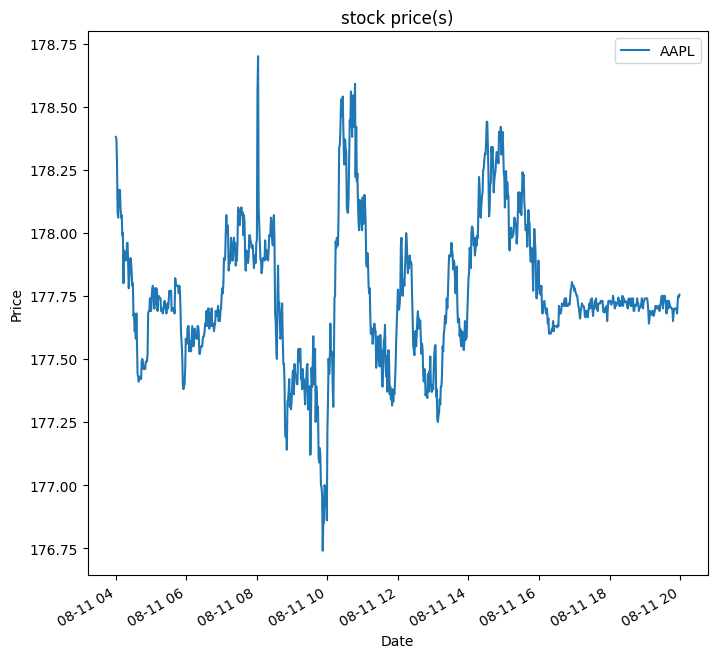

In [172]:
plot_stocks(daily['2023-08-11':'2023-08-11'])

In [188]:
def calc_daily_returns(df):
    dr = df.copy()
    dr[1:] = (df[1:] / df[:-1].values) -1
    dr.iloc[0, :] = 0
    return dr

In [189]:
dr = calc_daily_returns(daily['2023-08-11':'2023-08-11'])

<Axes: xlabel='date'>

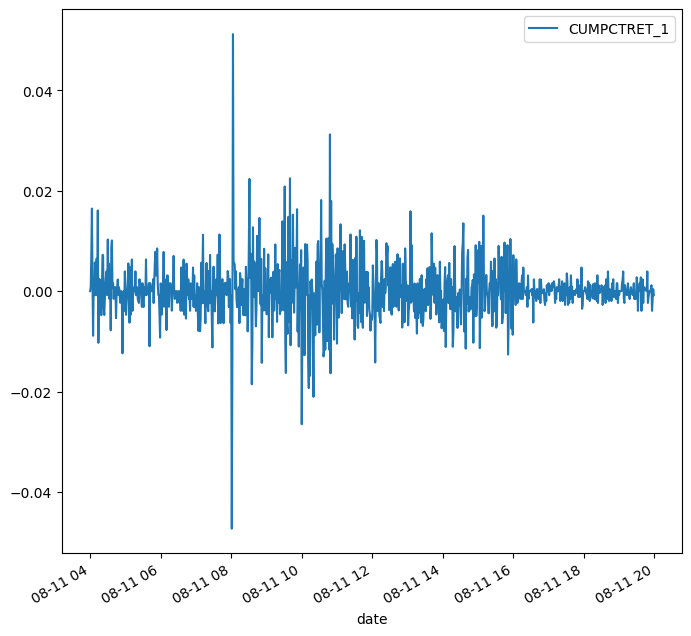

In [192]:
dr.plot(y='CUMPCTRET_1', figsize=(8, 8))

In [194]:
dr.head()

,Open,High,Low,Close,Volume,CUMPCTRET_1
date,,,,,,
2023-08-11 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08-11 04:01:00,0.000112,-0.002069,0.000280,-0.000056,-0.702680,0.000830
2023-08-11 04:02:00,-0.000448,-0.000280,-0.002074,-0.000505,3.642254,0.007460
2023-08-11 04:03:00,-0.000953,-0.001065,0.000337,-0.001122,-0.353762,0.016455
2023-08-11 04:04:00,-0.000617,-0.000112,0.000000,-0.000112,1.965258,0.001619


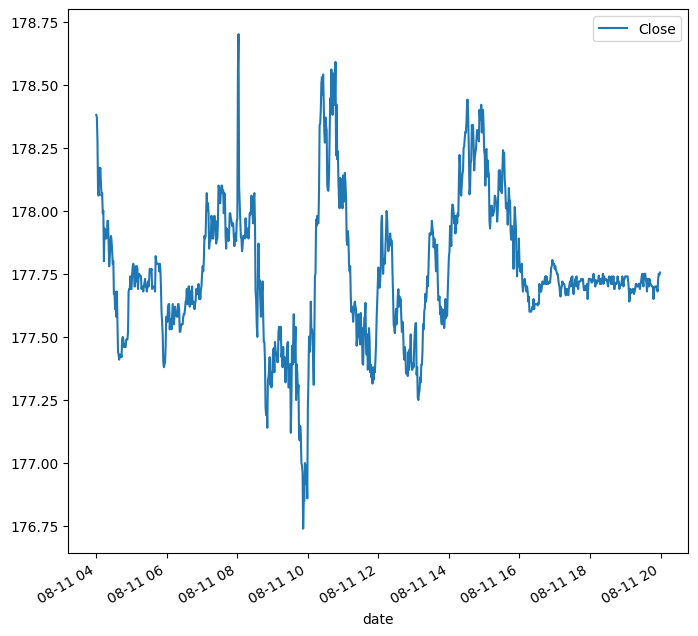

In [193]:
xd = daily['2023-08-11':'2023-08-11'].plot(y='Close', figsize=(8, 8))

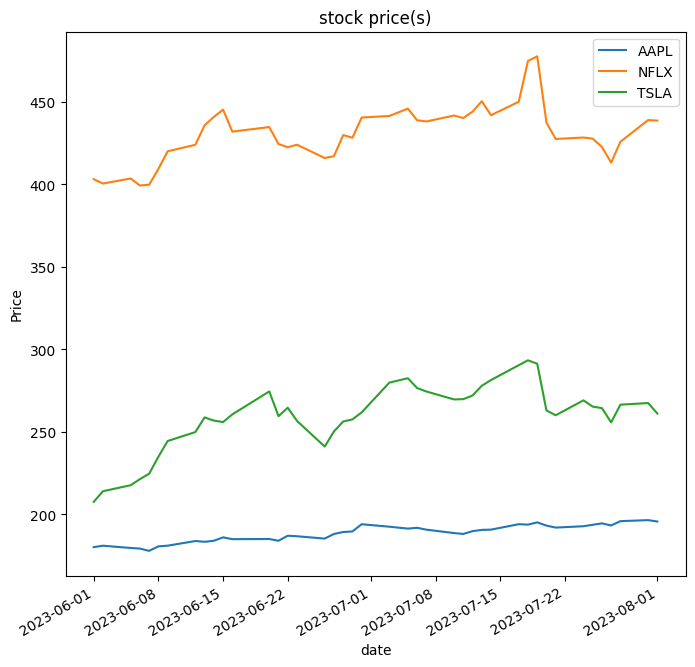

In [195]:
plot_stocks(AAPL, NFLX, TSLA)

<Axes: xlabel='date'>

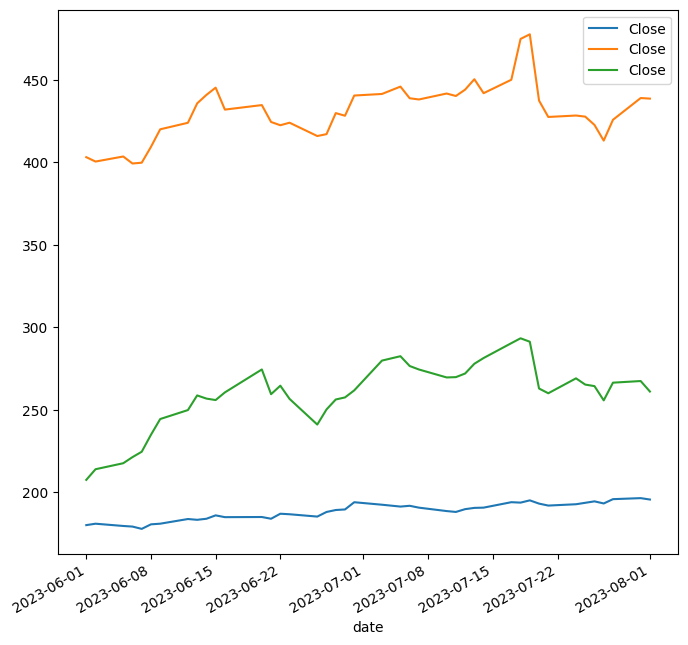

In [75]:
ax = AAPL.plot(y='Close', figsize=(8, 8))
NFLX.plot(ax=ax,y='Close')
TSLA.plot(ax=ax,y='Close')


In [484]:
tesladaily = get_intraday('TSLA', '1min')
netflixdaily = get_intraday('NFLX', '1min')

In [452]:
teslatemp = tesladaily.copy()

In [453]:
teslatemp['9'] = teslatemp.ta.sma(9)
teslatemp['21'] = teslatemp.ta.sma(21)
#qw.dropna(inplace=True)

In [454]:
teslatemp['signal'] = np.where(teslatemp['9'] > teslatemp['21'], 1, 0)
teslatemp['signal'] = np.where(teslatemp['9'] < teslatemp['21'], -1, teslatemp['signal'])

In [455]:
teslatemp['entry'] = teslatemp['signal'].diff()

In [459]:
teslatemp.tail()

,Open,High,Low,Close,Volume,9,21,signal,entry
date,,,,,,,,,
2023-08-11 19:55:00,242.04,242.15,242.02,242.02,2121.0,241.968889,242.109286,-1,0.0
2023-08-11 19:56:00,242.01,242.13,242.00,242.06,1782.0,241.974444,242.100000,-1,0.0
2023-08-11 19:57:00,242.06,242.10,242.00,242.05,4379.0,241.978889,242.088095,-1,0.0
2023-08-11 19:58:00,242.04,242.09,242.00,242.04,3663.0,241.988889,242.078095,-1,0.0
2023-08-11 19:59:00,242.00,242.10,241.80,241.90,14742.0,241.983333,242.060000,-1,0.0


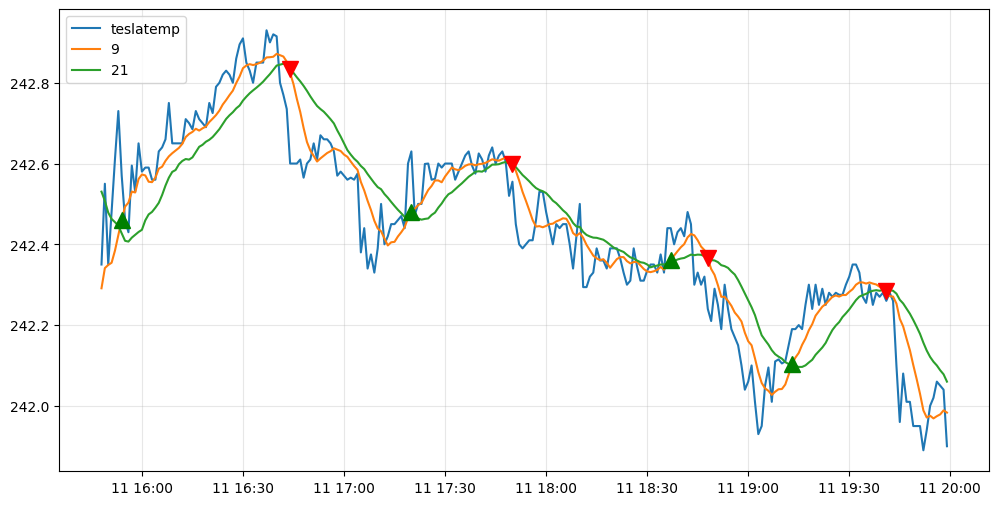

In [460]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(teslatemp.iloc[-252:]['Close'], label = 'teslatemp')
plt.plot(teslatemp.iloc[-252:]['9'], label = '9')
plt.plot(teslatemp.iloc[-252:]['21'], label = '21')
plt.plot(teslatemp[-252:].loc[teslatemp.entry == 2].index, teslatemp[-252:]['9'][teslatemp.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(daily[-252:].loc[teslatemp.entry == -2].index, teslatemp[-252:]['21'][teslatemp.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [505]:
tesladaily = tesladaily['2023-08-08':'2023-08-08']
netflixdaily = netflixdaily['2023-08-08':'2023-08-08']

In [508]:
tesladaily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 960 entries, 2023-08-08 04:00:00 to 2023-08-08 19:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    960 non-null    float64
 1   High    960 non-null    float64
 2   Low     960 non-null    float64
 3   Close   960 non-null    float64
 4   Volume  960 non-null    float64
dtypes: float64(5)
memory usage: 77.3 KB


In [509]:
netflixdaily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 811 entries, 2023-08-08 04:00:00 to 2023-08-08 19:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    811 non-null    float64
 1   High    811 non-null    float64
 2   Low     811 non-null    float64
 3   Close   811 non-null    float64
 4   Volume  811 non-null    float64
dtypes: float64(5)
memory usage: 38.0 KB


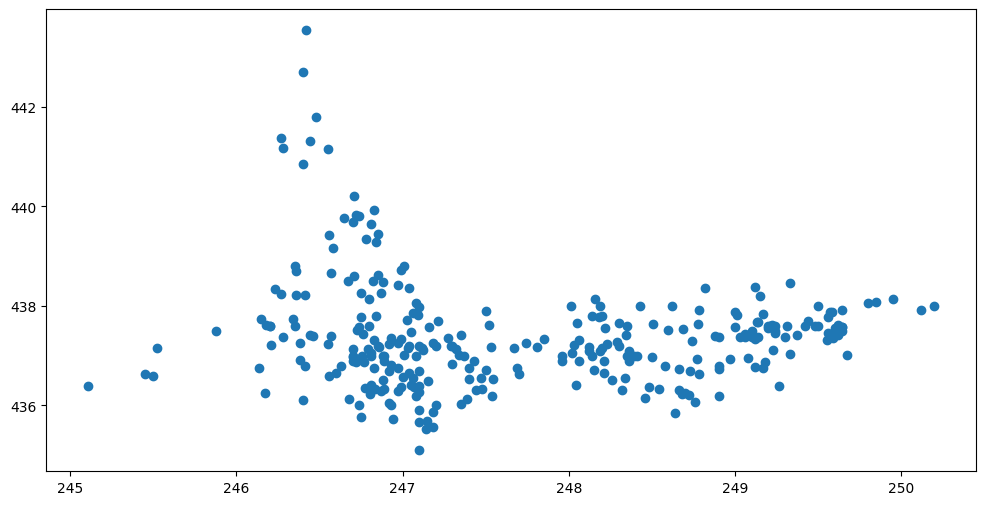

In [510]:
plt.scatter(tesladaily[100:400].Close, netflixdaily[100:400].Close)

In [ ]:
returns = np.log()